In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#load movie data
movies = pd.read_csv("movies.csv")

# Print the first few rows of the DataFrame
print(movies.head())

                                              poster  \
0  https://m.media-amazon.com/images/S/sash/4Fyxw...   
1  https://m.media-amazon.com/images/S/sash/4Fyxw...   
2  https://m.media-amazon.com/images/S/sash/4Fyxw...   
3  https://m.media-amazon.com/images/S/sash/4Fyxw...   
4  https://m.media-amazon.com/images/S/sash/4Fyxw...   

                      title certificate  runtime                      genre  \
0  The Shawshank Redemption          15  142 min                      Drama   
1           The Dark Knight         12A  152 min       Action, Crime, Drama   
2                 Inception         12A  148 min  Action, Adventure, Sci-Fi   
3                Fight Club          18  139 min                      Drama   
4              Pulp Fiction          18  154 min               Crime, Drama   

   rating                                              about  \
0     9.3  Two imprisoned men bond over a number of years...   
1     9.0  When the menace known as the Joker wreaks havo...

In [5]:
# Filter to remove rows where 'certificate' contains runtime (values with 'min')
movies = movies[~movies['certificate'].str.contains('min')]

# Show the cleaned data
print(movies.head())

                                              poster  \
0  https://m.media-amazon.com/images/S/sash/4Fyxw...   
1  https://m.media-amazon.com/images/S/sash/4Fyxw...   
2  https://m.media-amazon.com/images/S/sash/4Fyxw...   
3  https://m.media-amazon.com/images/S/sash/4Fyxw...   
4  https://m.media-amazon.com/images/S/sash/4Fyxw...   

                      title certificate  runtime                      genre  \
0  The Shawshank Redemption          15  142 min                      Drama   
1           The Dark Knight         12A  152 min       Action, Crime, Drama   
2                 Inception         12A  148 min  Action, Adventure, Sci-Fi   
3                Fight Club          18  139 min                      Drama   
4              Pulp Fiction          18  154 min               Crime, Drama   

   rating                                              about  \
0     9.3  Two imprisoned men bond over a number of years...   
1     9.0  When the menace known as the Joker wreaks havo...

In [6]:
# Summary of categorical columns
for column in ['certificate', 'genre', 'director']:
    print(f"Summary for {column}:")
    print(f"Sample size: {movies[column].notnull().sum()}")
    print(movies[column].value_counts(), "\n")

Summary for certificate:
Sample size: 4970
certificate
15           1843
12A           788
18            659
PG            614
U             362
12            278
A             186
X             134
AA             59
R              12
UA             11
PG-13          11
Not Rated       7
Rejected        5
(Banned)        1
Name: count, dtype: int64 

Summary for genre:
Sample size: 4970
genre
Comedy, Drama, Romance       242
Comedy, Romance              155
Drama                        154
Comedy, Drama                147
Action, Crime, Drama         146
                            ... 
Drama, Musical, Sport          1
Crime, Romance, Thriller       1
Crime, Horror, Western         1
Crime, Horror, Sci-Fi          1
Biography, Drama, Fantasy      1
Name: count, Length: 346, dtype: int64 

Summary for director:
Sample size: 4970
director
Woody Allen         38
Clint Eastwood      27
Steven Spielberg    27
Alfred Hitchcock    24
Ridley Scott        21
                    ..
Yann Demange 

In [7]:
#clean data
# Remove the dollar sign and "M"
movies['gross_earn'] = movies['gross_earn'].str.replace('$', '').str.replace('M', '')

# Convert the column to numeric
movies['gross_earn'] = pd.to_numeric(movies['gross_earn'])

In [8]:
#clean data
# transform the gross_earn to log
movies['log_gross_earn'] = np.log(movies['gross_earn'] + 1)

In [9]:
# Clean the runtime column by removing non-numeric characters
movies['runtime'] = movies['runtime'].astype(str).str.replace(r'[^0-9]', '', regex=True)

# Convert the cleaned runtime column to numeric
movies['runtime'] = pd.to_numeric(movies['runtime'], errors='coerce')

# Check the result
print(movies['runtime'].head())

0    142
1    152
2    148
3    139
4    154
Name: runtime, dtype: int64


In [10]:
movies.shape

(4970, 12)

In [11]:
movies.columns

Index(['poster', 'title', 'certificate', 'runtime', 'genre', 'rating', 'about',
       'director', 'stars', 'votes', 'gross_earn', 'log_gross_earn'],
      dtype='object')

In [12]:
movies = movies.drop('gross_earn', axis = 1)

In [13]:
movies = movies.drop('poster', axis = 1)

In [14]:
# Summary statistics
print(movies.describe())

           runtime       rating  log_gross_earn
count  4970.000000  4970.000000     4574.000000
mean    110.267606     6.694004        3.055101
std      21.441886     0.967945        1.505725
min      45.000000     1.500000        0.000000
25%      96.000000     6.100000        2.053796
50%     106.000000     6.800000        3.370223
75%     120.000000     7.400000        4.152181
max     366.000000     9.300000        6.843387


In [15]:
# check missing data
missing_data = movies.isnull()
print(missing_data)

      title  certificate  runtime  genre  rating  about  director  stars  \
0     False        False    False  False   False  False     False  False   
1     False        False    False  False   False  False     False  False   
2     False        False    False  False   False  False     False  False   
3     False        False    False  False   False  False     False  False   
4     False        False    False  False   False  False     False  False   
...     ...          ...      ...    ...     ...    ...       ...    ...   
4994  False        False    False  False   False  False     False  False   
4995  False        False    False  False   False  False     False  False   
4996  False        False    False  False   False  False     False  False   
4998  False        False    False  False   False  False     False  False   
4999  False        False    False  False   False  False     False  False   

      votes  log_gross_earn  
0     False           False  
1     False           False

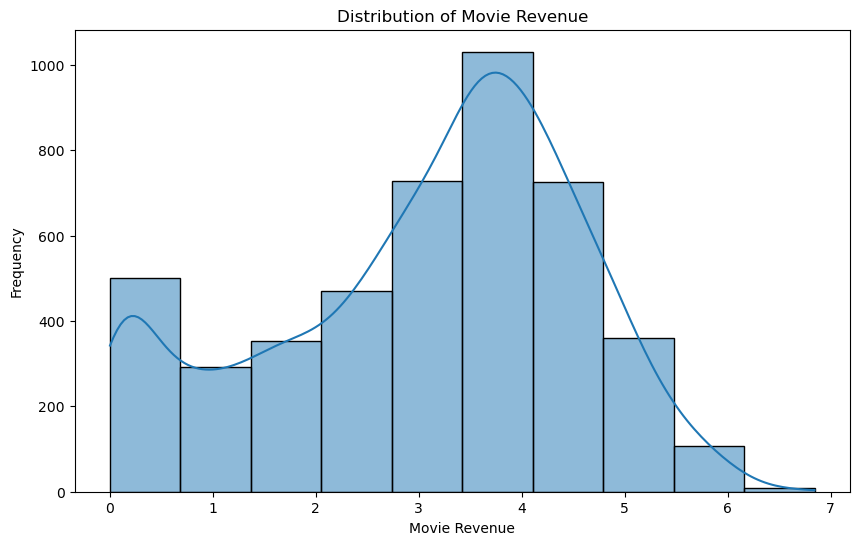

In [16]:
# Histogram for Movie Revenue
plt.figure(figsize=(10, 6))
sns.histplot(movies['log_gross_earn'], bins=10, kde=True)
plt.title('Distribution of Movie Revenue')
plt.xlabel('Movie Revenue')
plt.ylabel('Frequency')
plt.show()

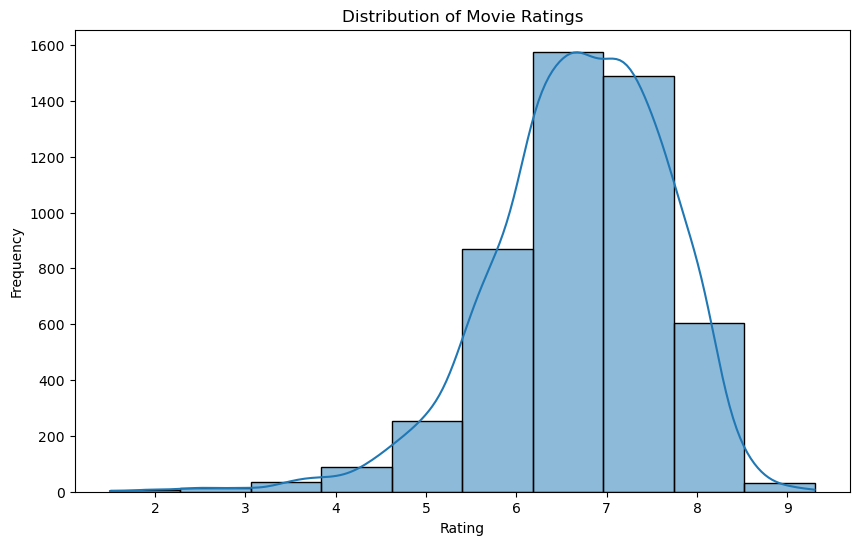

In [17]:
# Histogram for Movie Ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

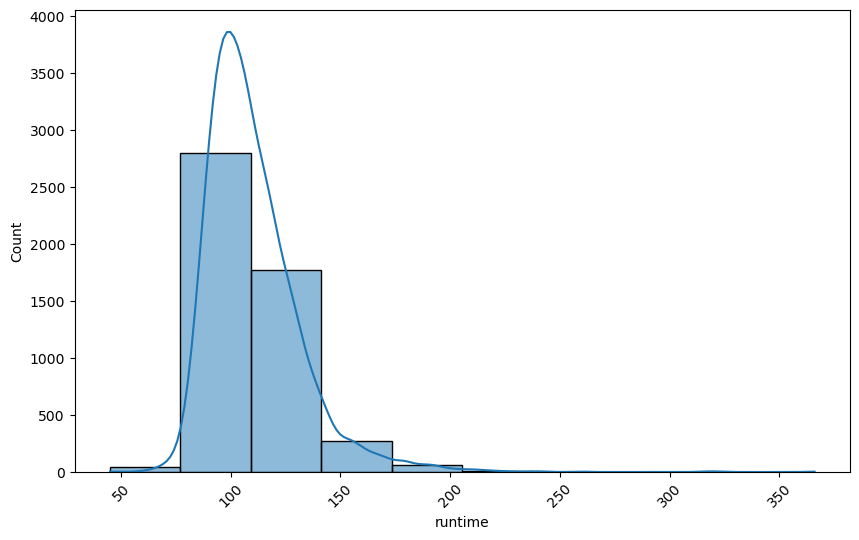

In [18]:
# Distribution of Runtime
plt.figure(figsize=(10, 6))
sns.histplot(movies['runtime'], bins=10, kde=True)

# Angle the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

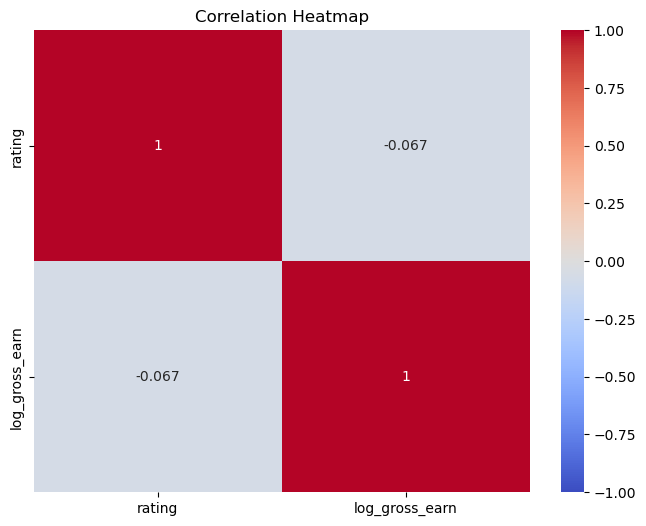

In [19]:
# Correlation matrix
corr = movies[['rating', 'log_gross_earn',]].corr()

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# Cross-tabulation of categorical variables
cross_tab = pd.crosstab(movies['genre'],movies['rating'])
print(cross_tab)

rating                        1.5  1.9  2.1  2.2  2.3  2.4  2.5  2.6  2.8  \
genre                                                                       
Action                          0    0    0    0    0    0    0    0    0   
Action, Adventure               0    0    0    0    0    0    0    0    0   
Action, Adventure, Biography    0    0    0    0    0    0    0    0    0   
Action, Adventure, Comedy       0    0    0    0    0    0    0    0    0   
Action, Adventure, Crime        0    0    0    0    0    0    0    0    0   
...                           ...  ...  ...  ...  ...  ...  ...  ...  ...   
Romance, Thriller               0    0    0    0    0    0    0    0    0   
Sci-Fi, Thriller                0    0    0    0    0    0    0    0    0   
Thriller                        0    0    0    0    0    0    0    0    0   
Thriller, War                   0    0    0    0    0    0    0    0    0   
Western                         0    0    0    0    0    0    0    0    0   

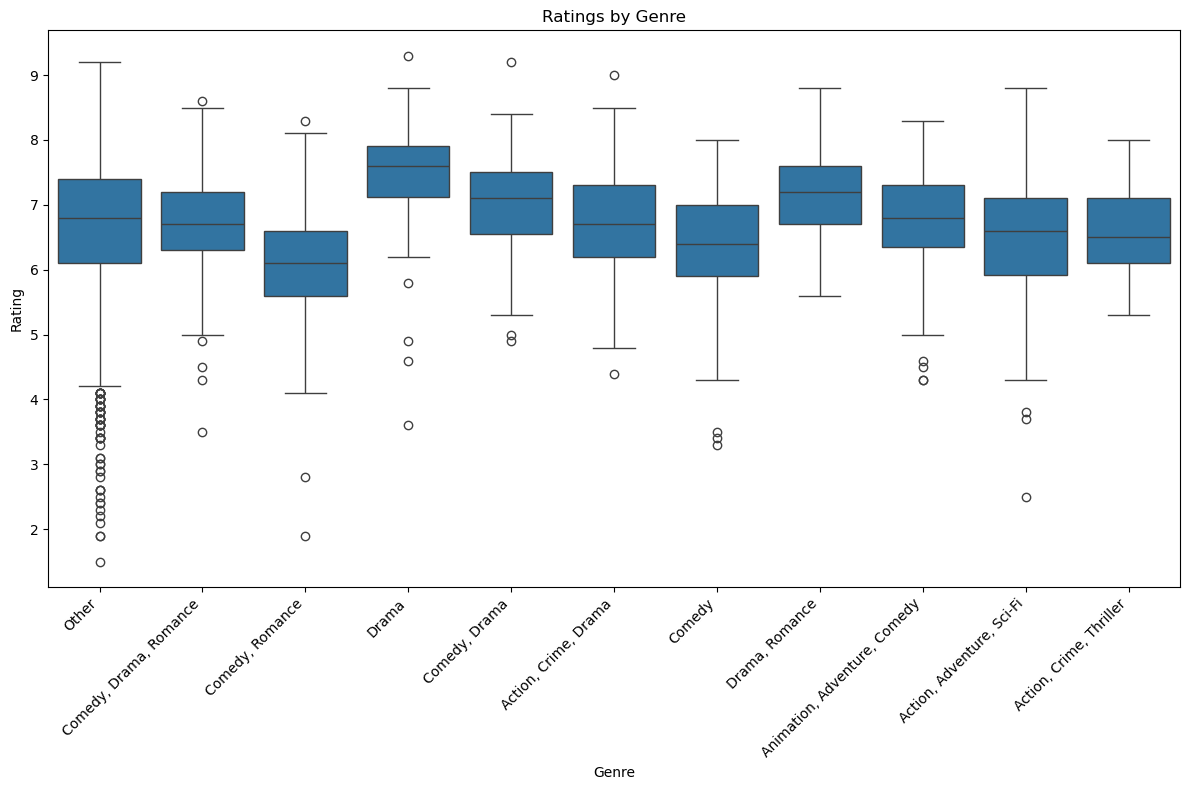

In [21]:
# Limit the number of unique genres by grouping rare ones into 'Other'
top_genres = movies['genre'].value_counts().nlargest(10).index  # Select the top 10 genres
movies['genre_filtered'] = movies['genre'].apply(lambda x: x if x in top_genres else 'Other')

# Create a boxplot with the filtered genres
plt.figure(figsize=(12, 8))  # Adjust size to prevent overlapping
sns.boxplot(x='genre_filtered', y='rating', data=movies, order=movies['genre_filtered'].value_counts().index)

plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Ratings by Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x-ticks for readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

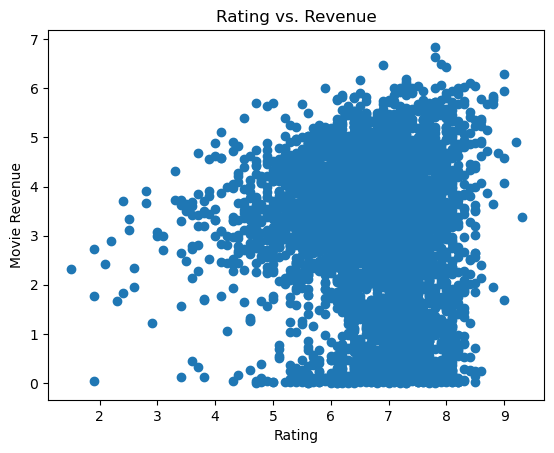

In [22]:
# Scatterplot of runtime vs. budget
plt.scatter(movies['rating'], movies['log_gross_earn'])
plt.xlabel('Rating')
plt.ylabel('Movie Revenue')
plt.title('Rating vs. Revenue')
plt.show()

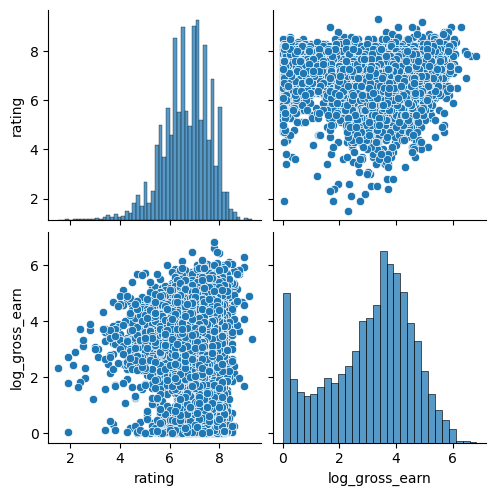

In [23]:
# Pair plot for a subset of the dataset
sns.pairplot(movies[['rating', 'log_gross_earn']])
plt.show()

In [1]:
#install for target encoding
%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
#load scikit learn libraries for cross validation and model fit
import category_encoders as ce
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import re
from sklearn.model_selection import train_test_split
import numpy as np

In [26]:
movies = movies.drop('director', axis = 1)

In [27]:
movies = movies.drop('votes', axis=1)

In [28]:
#split training and test data and y
X = movies.drop(columns = ['log_gross_earn'])
y = movies['log_gross_earn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train
X_test
y_train
y_test

#fill missing target values with the mean or median
y_train_cleaned = y_train.fillna(y_train.mean())

# Define the target encoder
target_encoder = ce.TargetEncoder(cols=['title', 'certificate', 'genre', 'about', 'stars'])

# Fit the encoder on the training data
X_train_encoded = target_encoder.fit_transform(X_train, y_train_cleaned)

# Transform the test data using the learned encodings
X_test_encoded = target_encoder.transform(X_test)

In [29]:
X_train_encoded

,title,certificate,runtime,genre,rating,about,stars,genre_filtered
1477,3.038390,2.732030,130,2.404218,7.5,3.038390,3.038390,Other
4066,2.866639,2.505941,180,2.061995,7.9,2.866639,2.866639,Other
2218,3.023830,2.732030,97,2.887950,6.3,3.023830,3.023830,Other
4115,2.822577,2.732030,84,3.452630,7.4,2.822577,2.822577,Comedy
80,2.901863,2.470210,136,2.901863,8.3,2.901863,2.901863,Other
...,...,...,...,...,...,...,...,...
4440,3.040422,3.529469,100,2.775700,6.3,3.040422,3.040422,"Comedy, Drama, Romance"
466,2.918920,2.732030,147,2.574885,7.9,2.918920,2.918920,Other
3096,2.647414,2.732030,102,2.748807,6.4,2.647414,2.647414,Other
3778,2.826178,2.732030,95,2.626521,7.7,2.826178,2.826178,Other


In [30]:
X_train_encoded.shape

(3976, 8)

In [31]:
X_test_encoded

,title,certificate,runtime,genre,rating,about,stars,genre_filtered
856,3.186106,2.505941,91,2.716417,7.4,3.040422,3.040422,Other
3663,3.040422,2.839447,85,3.053555,7.7,3.040422,3.040422,Other
4621,3.040422,3.545374,110,2.775700,6.1,3.040422,3.040422,"Comedy, Drama, Romance"
4382,3.040422,2.505941,97,2.716417,5.5,3.040422,3.040422,Other
3877,3.040422,3.765395,153,3.010329,7.4,3.040422,3.040422,Other
...,...,...,...,...,...,...,...,...
2892,3.040422,2.505941,97,2.404218,7.5,3.040422,3.040422,Other
422,3.040422,3.545374,183,2.964169,6.2,3.040422,3.040422,Other
95,3.040422,2.732030,112,3.178781,7.9,3.040422,3.040422,Other
2457,3.040422,3.545697,125,3.543439,5.0,3.040422,3.040422,Other


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#fit a KNN model to the movie data

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler(with_mean=False)),
    ('knn', KNeighborsRegressor(n_neighbors=3))
])

# Train the pipeline
#pipeline.fit(X_train_encoded, y_train_cleaned)

# Make predictions
#y_pred = pipeline.predict(X_test)
#print(y_pred)

# 83 NaNs are present in y_test, fill them with the mean
#y_test = y_test.fillna(y_test.mean())

# Calculate RMSE
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE
#print(f"Out of Sample RMSE: {rmse}")

In [37]:
# Check if y_test contains any NaN values
#print(f"NaN values in y_test: {y_test.isna().sum()}")

# Check if y_pred contains any NaN values (this should rarely happen unless there's an issue with the model)
#print(f"NaN values in y_pred: {np.isnan(y_pred).sum()}")